<div style="background-color: #FFB6C1; padding: 20px; border-radius: 15px; border-top-right-radius: 50px; border-bottom-left-radius: 50px; text-align: center; font-size: 2em; font-weight: bold; color: #FFFFFF;">
  🩺 Asthma Dataset Analysis
</div>

<div style="text-align: center;">
  <img src="https://www.houstonent.com/hubfs/blog%20images/Asthma%20symptoms%20and%20causes%20%281%29.jpg" alt="Asthma Image" style="max-width: 80%; border-radius: 10px;">
  <p style="font-style: italic; color: #808080; font-size: 0.8em;">Houston ENT & Allergy</p>
</div>


<div style="background-color: #FAEBD7; padding: 15px; border-radius: 10px; border-top-left-radius: 50px; border-bottom-right-radius: 50px; font-size: 1.2em; color: #8B0000;">
  <p>Welcome to the comprehensive analysis of an asthma dataset. In this notebook, we will explore the dataset, perform feature engineering, and implement several machine learning models to predict asthma-related outcomes. We will also delve into deep learning techniques using PyTorch and building an ANN from scratch using Numpy and Scipy.</p>
  <p>Our goal is to gain insights into the factors influencing asthma and develop robust predictive models to aid in its diagnosis and management.</p>
</div>

In [167]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Preprocessing 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import ADASYN
from tqdm import tqdm


# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Deep learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from collections import Counter as ctr

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("dark")
# plt.rcParams['figure.figsize'] = (10, 6)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [106]:
df = pd.read_csv('/kaggle/input/asthma-disease-dataset/asthma_disease_data.csv')

<div style="background-color: #FAEBD7; padding: 15px; border-radius: 10px; border-top-left-radius: 50px; border-bottom-right-radius: 50px; text-align: center; font-size: 1.5em; font-weight: bold; color: #8B0000;">
  📊 Exploratory Data Analysis (EDA)
</div>

<div style="background-color: #FFFACD; padding: 10px; border-radius: 10px; border-top-right-radius: 30px; border-bottom-left-radius: 30px; font-size: 1.2em; color: #2F4F4F;">
  🔍 Data Overview
</div>

In [107]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

<div style="background-color: #FFDAB9; padding: 15px; border-radius: 15px; border-top-right-radius: 50px; border-bottom-left-radius: 50px; text-align: center; font-size: 1.5em; font-weight: bold; color: #8B0000;">
  📊 Dataset Columns
</div>

<table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
  <tr style="background-color: #F0E68C; color: #8B4513; font-weight: bold; text-align: left;">
    <th style="padding: 8px; border: 1px solid #8B4513;">Column Name</th>
    <th style="padding: 8px; border: 1px solid #8B4513;">Description</th>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">PatientID</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Unique identifier for each patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">Age</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Age of the patient in years</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">Gender</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Gender of the patient (Male/Female)</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">Ethnicity</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Ethnicity of the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">EducationLevel</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Highest level of education completed by the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">BMI</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Body Mass Index (BMI) of the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">Smoking</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Smoking status of the patient (Smoker/Non-smoker)</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">PhysicalActivity</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Level of physical activity of the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">DietQuality</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Quality of the patient's diet</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">SleepQuality</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Quality of sleep of the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">PollutionExposure</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Level of pollution exposure experienced by the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">PollenExposure</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Exposure to pollen experienced by the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">DustExposure</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Exposure to dust experienced by the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">PetAllergy</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Allergy to pets experienced by the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">FamilyHistoryAsthma</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Family history of asthma in the patient's relatives</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">HistoryOfAllergies</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">History of allergies in the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">Eczema</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Presence of eczema in the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">HayFever</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">History of hay fever in the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">GastroesophagealReflux</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Presence of gastroesophageal reflux disease in the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">LungFunctionFEV1</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Forced Expiratory Volume in 1 second (FEV1) as a measure of lung function</td>
  </tr>
    <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">LungFunctionFVC</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Forced Vital Capacity (FVC) as a measure of lung function</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">Wheezing</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Presence of wheezing symptoms experienced by the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">ShortnessOfBreath</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Presence of shortness of breath experienced by the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">ChestTightness</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Presence of chest tightness experienced by the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">Coughing</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Frequency of coughing episodes experienced by the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">NighttimeSymptoms</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Frequency of nighttime asthma symptoms experienced by the patient</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">ExerciseInduced</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Presence of exercise-induced asthma symptoms in the patient</td>
  </tr>
  <tr style="background-color: #FFA07A; color: #8B0000;">
    <td style="padding: 8px; border: 1px solid #8B4513;">Diagnosis</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Target variable indicating asthma diagnosis</td>
  </tr>
  <tr style="background-color: #FFF8DC; color: #2F4F4F;">
    <td style="padding: 8px; border: 1px solid #8B4513;">DoctorInCharge</td>
    <td style="padding: 8px; border: 1px solid #8B4513;">Name of the doctor responsible for the patient's care</td>
  </tr>
</table>


In [108]:
df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
5,5039,21,0,2,0,21.812975,0,0.470044,1.759118,9.549262,...,2.328191,5.898515,1,0,1,0,0,1,0,Dr_Confid
6,5040,45,1,1,1,30.245954,1,9.371784,7.030507,5.746128,...,2.995100,1.701512,1,1,1,0,0,0,0,Dr_Confid
7,5041,26,0,0,1,26.048416,1,8.344096,1.626484,6.431179,...,2.069343,4.012260,1,0,0,1,1,1,0,Dr_Confid
8,5042,49,1,1,2,32.676204,0,2.690256,3.920034,5.843645,...,1.761242,5.190931,1,1,1,1,0,0,0,Dr_Confid
9,5043,45,1,1,1,29.910298,0,2.895720,2.607700,7.234908,...,2.848420,5.771022,1,0,0,0,1,1,0,Dr_Confid


In [109]:
df.dtypes

PatientID                   int64
Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
DoctorInCharge             object
dtype: object

In [110]:
df.sample(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
1300,6334,22,0,1,2,23.304926,0,2.736208,9.636609,5.534794,...,2.660795,2.882896,0,1,0,0,1,1,0,Dr_Confid
1713,6747,57,1,0,2,21.977600,0,4.012130,8.169266,5.322798,...,3.133421,1.621533,1,1,1,1,0,0,0,Dr_Confid
2087,7121,20,1,0,2,32.109596,0,8.420217,5.040159,4.057401,...,3.594034,3.508904,1,1,1,0,0,1,0,Dr_Confid
368,5402,79,1,0,2,27.858188,0,4.102267,4.308823,5.363210,...,3.175676,5.425659,0,0,0,0,1,1,0,Dr_Confid
1747,6781,6,1,3,0,37.100933,0,6.962054,6.341216,4.444932,...,3.270578,4.532966,0,0,0,1,1,1,0,Dr_Confid
2352,7386,77,1,1,2,35.433853,0,9.213233,1.010416,5.066235,...,2.334586,1.673168,1,1,1,0,1,1,1,Dr_Confid
948,5982,53,1,0,3,26.658346,0,4.455241,8.850662,6.554253,...,1.397682,2.780564,1,1,0,1,0,1,0,Dr_Confid
1637,6671,30,0,0,1,15.469064,0,2.022762,8.569719,8.836622,...,3.102929,4.436884,0,0,0,1,0,1,0,Dr_Confid
204,5238,72,0,0,2,22.639425,0,1.020656,5.037407,4.904242,...,2.767611,3.576279,0,1,0,1,0,1,0,Dr_Confid
628,5662,75,1,0,2,32.805488,0,6.313056,5.050749,4.095809,...,1.003430,5.411063,0,0,1,1,1,1,0,Dr_Confid


In [111]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [112]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
df.drop('PatientID',axis=1, inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

<div style="background-color: #E0FFFF; padding: 10px; border-radius: 10px; border-top-left-radius: 30px; border-bottom-right-radius: 30px; font-size: 1.2em; color: #2F4F4F;">
  📈 Visualizations
</div>

### Distribution of Age

Text(0.5, 0, 'Age')

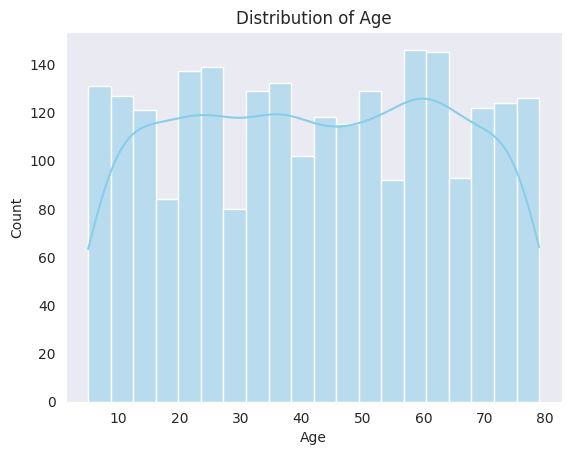

In [115]:
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')

### Count of Gender

Text(0.5, 1.0, 'Count of Gender')

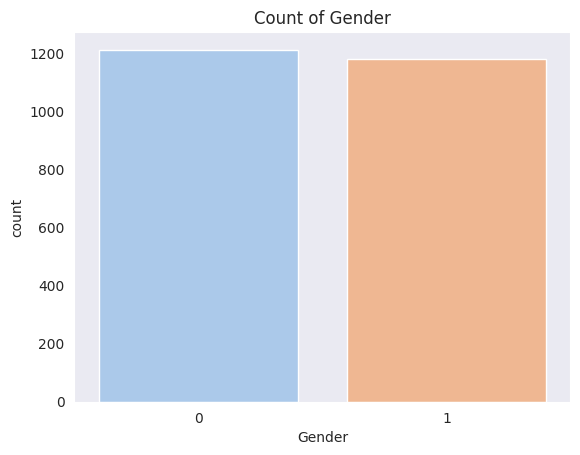

In [116]:
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Count of Gender')

### Distribution of BMI

Text(0.5, 1.0, 'Distribution of BMI')

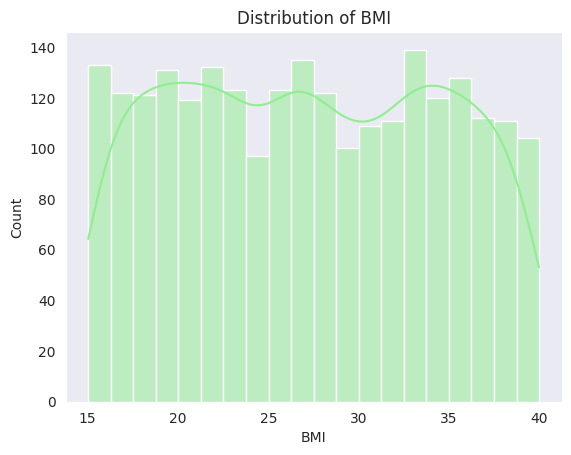

In [117]:
sns.histplot(df['BMI'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of BMI')

### Relationship between BMI and Lung Function (FEV1)

Text(0, 0.5, 'FEV1')

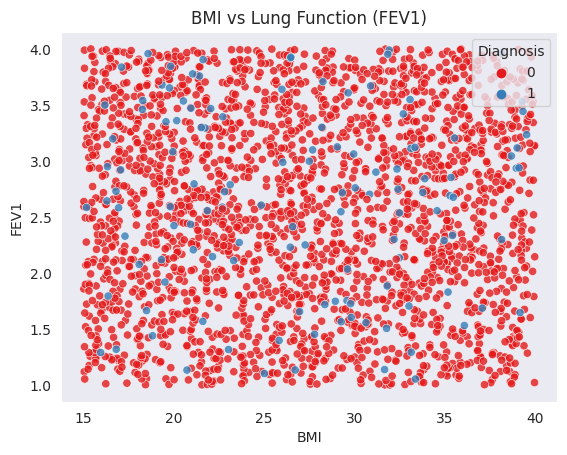

In [118]:
sns.scatterplot(x='BMI', y='LungFunctionFEV1', data=df, hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('BMI vs Lung Function (FEV1)')
plt.xlabel('BMI')
plt.ylabel('FEV1')

### Barplot of Ethnicity

Text(0.5, 1.0, 'Ethnicity Distribution')

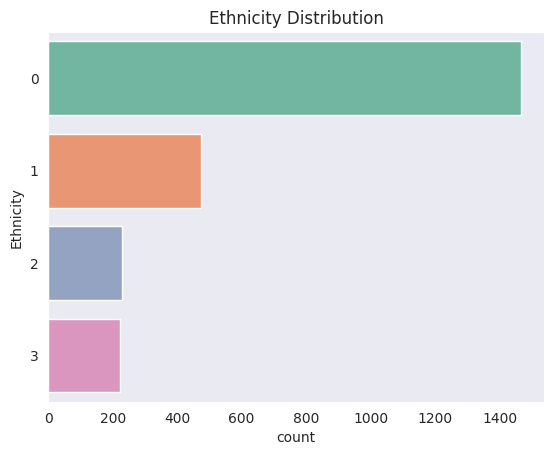

In [119]:
sns.countplot(y='Ethnicity', data=df, palette='Set2', order=df['Ethnicity'].value_counts().index)
plt.title('Ethnicity Distribution')

### Scatterplot - BMI vs Lung Function (FEV1)

Text(0, 0.5, 'FEV1')

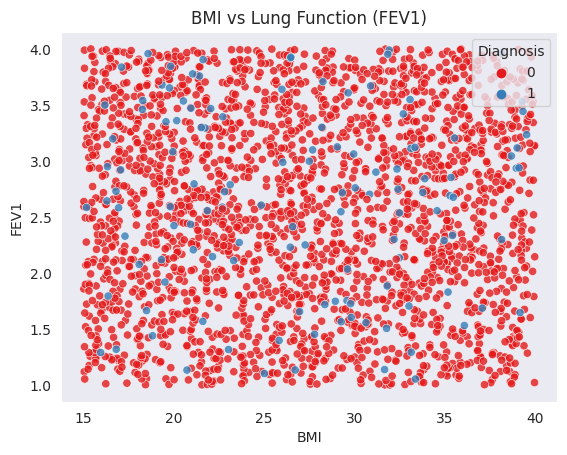

In [120]:
sns.scatterplot(x='BMI', y='LungFunctionFEV1', data=df, hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('BMI vs Lung Function (FEV1)')
plt.xlabel('BMI')
plt.ylabel('FEV1')

### Scatterplot - BMI vs Lung Function (FEV1)

Text(0.5, 1.0, 'Age vs Smoking Status')

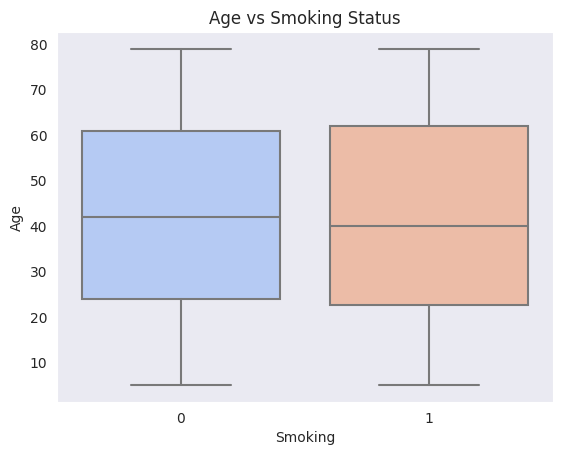

In [121]:
sns.boxplot(x='Smoking', y='Age', data=df, palette='coolwarm')
plt.title('Age vs Smoking Status')

### Barplot of Education Level

Text(0.5, 1.0, 'Education Level Distribution')

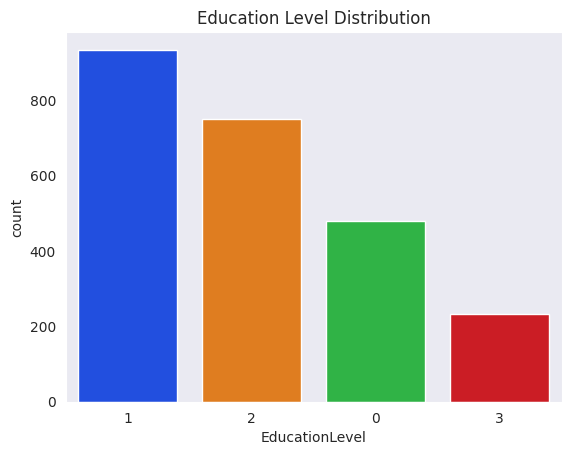

In [122]:
sns.countplot(x='EducationLevel', data=df, palette='bright', order=df['EducationLevel'].value_counts().index)
plt.title('Education Level Distribution')

### Correlation Heatmap of Numerical Features

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

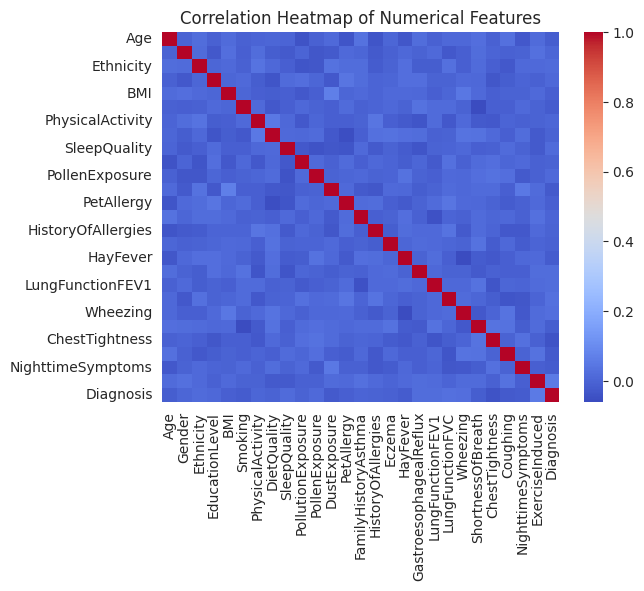

In [123]:
numerical_features = df.select_dtypes(exclude='object').columns
sns.heatmap(df[numerical_features].corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')

### Countplot - Family History of Asthma

Text(0.5, 1.0, 'Family History of Asthma')

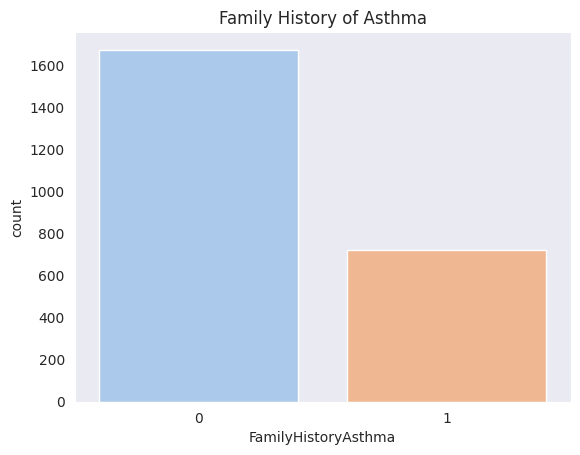

In [124]:
sns.countplot(x='FamilyHistoryAsthma', data=df, palette='pastel')
plt.title('Family History of Asthma')

### Scatterplot - BMI vs Physical Activity

Text(0, 0.5, 'Physical Activity')

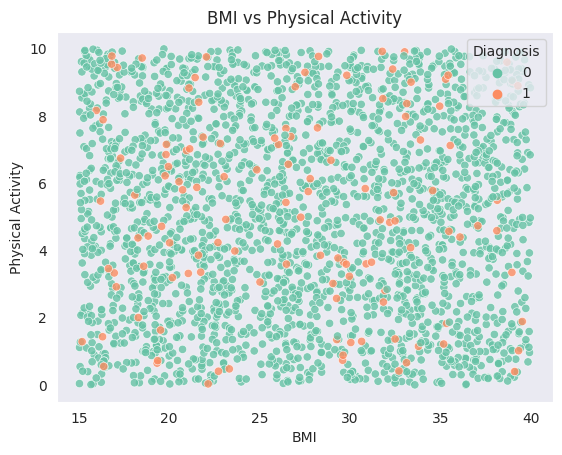

In [125]:
sns.scatterplot(x='BMI', y='PhysicalActivity', data=df, hue='Diagnosis', palette='Set2', alpha=0.8)
plt.title('BMI vs Physical Activity')
plt.xlabel('BMI')
plt.ylabel('Physical Activity')

### Distribution of Lung Function (FVC)

Text(0.5, 1.0, 'Distribution of Lung Function (FVC)')

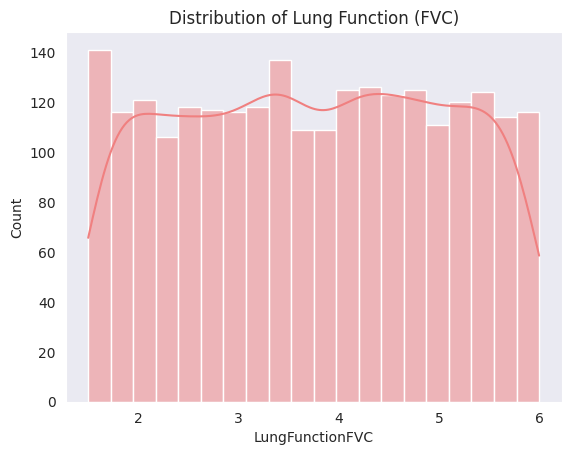

In [126]:
sns.histplot(df['LungFunctionFVC'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Lung Function (FVC)')

### Barplot - Diagnosis

Text(0.5, 1.0, 'Diagnosis Distribution')

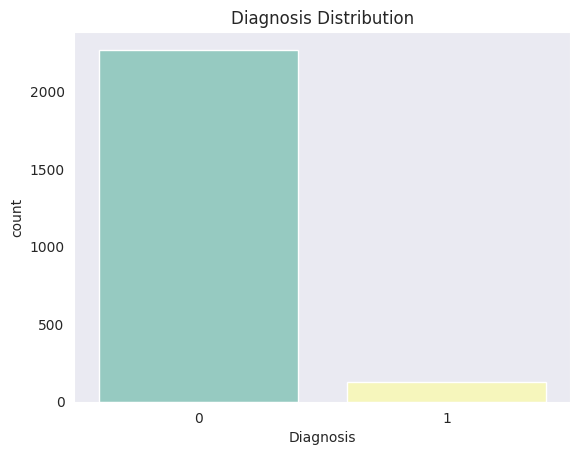

In [127]:
sns.countplot(x='Diagnosis', data=df, palette='Set3')
plt.title('Diagnosis Distribution')






<div style="background-color: #F5F5F5; padding: 10px; border-radius: 10px; border-top-right-radius: 30px; border-bottom-left-radius: 30px; font-size: 1.2em; color: #2F4F4F;">
  🛠️ Feature Engineering
</div>

In [128]:
df.drop(['DoctorInCharge'],axis=1, inplace=True)

In [129]:
age_bins = [0, 12, 19, 60, 100]
age_labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [130]:
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

In [131]:
df['LifestyleScore'] = df[['PhysicalActivity', 'DietQuality', 'SleepQuality']].mean(axis=1)

In [132]:
df['AllergyScore'] = df[['PetAllergy', 'HistoryOfAllergies', 'Eczema', 'HayFever']].sum(axis=1)

In [133]:
df['ExposureScore'] = df[['PollutionExposure', 'PollenExposure', 'DustExposure']].mean(axis=1)

In [134]:
df['SymptomSeverityScore'] = df[['Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced']].sum(axis=1)

In [135]:
df['LungFunctionRatio'] = df['LungFunctionFEV1'] / df['LungFunctionFVC']

In [136]:
df.head(2)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,NighttimeSymptoms,ExerciseInduced,Diagnosis,AgeGroup,BMICategory,LifestyleScore,AllergyScore,ExposureScore,SymptomSeverityScore,LungFunctionRatio
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1,0,Senior,Underweight,5.028049,1,3.739466,2,0.277068
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,1,1,0,Adult,Normal,5.797437,1,5.337378,4,1.290987


In [137]:
df.dtypes

Age                          int64
Gender                       int64
Ethnicity                    int64
EducationLevel               int64
BMI                        float64
Smoking                      int64
PhysicalActivity           float64
DietQuality                float64
SleepQuality               float64
PollutionExposure          float64
PollenExposure             float64
DustExposure               float64
PetAllergy                   int64
FamilyHistoryAsthma          int64
HistoryOfAllergies           int64
Eczema                       int64
HayFever                     int64
GastroesophagealReflux       int64
LungFunctionFEV1           float64
LungFunctionFVC            float64
Wheezing                     int64
ShortnessOfBreath            int64
ChestTightness               int64
Coughing                     int64
NighttimeSymptoms            int64
ExerciseInduced              int64
Diagnosis                    int64
AgeGroup                  category
BMICategory         

In [138]:
df['AgeGroup'] = df['AgeGroup'].astype('object')
df['BMICategory'] = df['BMICategory'].astype('object')

In [139]:
df.dtypes

Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
AgeGroup                   object
BMICategory                object
LifestyleScore

In [140]:
le = LabelEncoder()

df['AgeGroup'] = le.fit_transform(df['AgeGroup'])
df['BMICategory'] = le.fit_transform(df['BMICategory'])

## Selecting top k features using SelectKBest

In [141]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']
k = 15 
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
df_selected = df[selected_features]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['Ethnicity', 'Smoking', 'SleepQuality', 'DustExposure', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ChestTightness', 'Coughing', 'NighttimeSymptoms',
       'ExerciseInduced', 'AgeGroup', 'AllergyScore'],
      dtype='object')


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

### Balancing The labels

In [143]:
ctr(y_train)

Counter({0: 1812, 1: 101})

In [144]:
sm = ADASYN(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [145]:
ctr(y_train)

Counter({0: 1812, 1: 1794})

<div style="background-color: #FFD700; padding: 15px; border-radius: 10px; border-top-left-radius: 50px; border-bottom-right-radius: 50px; text-align: center; font-size: 1.5em; font-weight: bold; color: #4B0082;">
  🤖 Machine Learning Models
</div>

<div style="background-color: #98FB98; padding: 10px; border-radius: 10px; border-top-right-radius: 30px; border-bottom-left-radius: 30px; font-size: 1.2em; color: #006400;">
  ⚙️ Support Vector Machine (SVM)
</div>

In [146]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [147]:
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_report(y_test, svm_preds))

Support Vector Machine (SVM) Accuracy: 0.6471816283924844
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.65      0.78       456
           1       0.07      0.52      0.12        23

    accuracy                           0.65       479
   macro avg       0.52      0.59      0.45       479
weighted avg       0.92      0.65      0.75       479



<div style="background-color: #ffd11a; padding: 15px; border-radius: 10px; margin-bottom: 20px;">
Accuracy: 64.71%
    
Classification Report:
The SVM model achieved an accuracy of 64.71%. It correctly identified most instances of the majority class (0), but struggled with the minority class (1), achieving very low precision, recall, and F1-score for class 1.
</div>


<div style="background-color: #FFDEAD; padding: 10px; border-radius: 10px; border-top-left-radius: 30px; border-bottom-right-radius: 30px; font-size: 1.2em; color: #8B4513;">
  🌳 Decision Tree
</div>

In [148]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [149]:
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print("\nDecision Tree Accuracy:", dt_accuracy)
print("Classification Report:\n", classification_report(y_test, dt_preds))


Decision Tree Accuracy: 0.8977035490605428
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       456
           1       0.07      0.09      0.08        23

    accuracy                           0.90       479
   macro avg       0.51      0.51      0.51       479
weighted avg       0.91      0.90      0.90       479



<div style="background-color: #ffd11a; padding: 15px; border-radius: 10px; margin-bottom: 20px;">
Accuracy: 89.77%
    
Classification Report:
The Decision Tree model showed an accuracy of 89.77%. While it performed decently for the majority class (0), it had difficulty accurately predicting the minority class (1), resulting in low scores for class 1 in precision, recall, and F1-score.</div>


<div style="background-color: #AFEEEE; padding: 10px; border-radius: 10px; border-top-right-radius: 30px; border-bottom-left-radius: 30px; font-size: 1.2em; color: #2E8B57;">
  🧠 Random Forest
</div>

In [150]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [151]:
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9519832985386222
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       456
           1       0.00      0.00      0.00        23

    accuracy                           0.95       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.91      0.95      0.93       479



<div style="background-color: #ffd11a; padding: 15px; border-radius: 10px; margin-bottom: 20px;">
Accuracy: 95.20%
    
Classification Report:
Similar to SVM, the Random Forest model achieved an accuracy of 95.20%. It excelled in predicting class 0 but struggled with class 1, showing very low metrics for precision, recall, and F1-score for this class.
</div>


<div style="background-color: #F08080; padding: 10px; border-radius: 10px; border-top-left-radius: 30px; border-bottom-right-radius: 30px; font-size: 1.2em; color: #8B0000;">
  🔥 XGBoost
</div>

In [152]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [153]:
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("\nXGBoost Accuracy:", xgb_accuracy)
print("Classification Report:\n", classification_report(y_test, xgb_preds))


XGBoost Accuracy: 0.9498956158663883
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       0.33      0.04      0.08        23

    accuracy                           0.95       479
   macro avg       0.64      0.52      0.53       479
weighted avg       0.92      0.95      0.93       479



<div style="background-color: #ffd11a; padding: 15px; border-radius: 10px; margin-bottom: 20px;">
Accuracy: 94.98%
    
Classification Report:
The SVM model achieved an accuracy of 94.98%. It correctly identified most instances of the majority class (0), but struggled with the minority class (1), achieving very low precision, recall, and F1-score for class 1.
</div>


<div style="background-color: #E6E6FA; padding: 10px; border-radius: 10px; border-top-right-radius: 30px; border-bottom-left-radius: 30px; font-size: 1.2em; color: #4B0082;">
  📌 K-Nearest Neighbors (KNN)
</div>

In [154]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', weights='distance')

In [155]:
knn_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
print("\nK-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("Classification Report:\n", classification_report(y_test, knn_preds))


K-Nearest Neighbors (KNN) Accuracy: 0.6743215031315241
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.69      0.80       456
           1       0.05      0.30      0.08        23

    accuracy                           0.67       479
   macro avg       0.50      0.50      0.44       479
weighted avg       0.91      0.67      0.77       479



<div style="background-color: #ffd11a; padding: 15px; border-radius: 10px; margin-bottom: 20px;">
Accuracy: 67.43%
    
Classification Report:
KNN achieved an accuracy of 67.43%. It showed good performance for class 0 but struggled with class 1, similar to other models, resulting in low precision, recall, and F1-score for the minority class.
</div>


<div style="background-color: #D8BFD8; padding: 15px; border-radius: 10px; border-top-left-radius: 50px; border-bottom-right-radius: 50px; text-align: center; font-size: 1.5em; font-weight: bold; color: #8A2BE2;">
  🧬 Deep Learning Models
</div>

<div style="background-color: #FFF8DC; padding: 10px; border-radius: 10px; border-top-right-radius: 30px; border-bottom-left-radius: 30px; font-size: 1.2em; color: #DAA520;">
  🔨 ANN with PyTorch
</div>

In [156]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long) 
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [157]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes, dropout_prob=0.5):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc3(out)
        return out

In [158]:
input_size = X_train.shape[1]
hidden_size1 = 128
hidden_size2 = 64
num_classes = 2  
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [159]:
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 0.1141
Epoch [2000/10000], Loss: 0.0592
Epoch [3000/10000], Loss: 0.0537
Epoch [4000/10000], Loss: 0.0447
Epoch [5000/10000], Loss: 0.0388
Epoch [6000/10000], Loss: 0.0341
Epoch [7000/10000], Loss: 0.0317
Epoch [8000/10000], Loss: 0.0345
Epoch [9000/10000], Loss: 0.0344
Epoch [10000/10000], Loss: 0.0325


In [160]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    test_accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
    print(f'\nTest Accuracy: {test_accuracy:.4f}')
    print('Classification Report:\n', classification_report(y_test_tensor.numpy(), predicted.numpy()))


Test Accuracy: 0.9499
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       0.00      0.00      0.00        23

    accuracy                           0.95       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.91      0.95      0.93       479



<div style="background-color: #ffd11a; padding: 15px; border-radius: 10px; margin-bottom: 20px;">
Test Accuracy: 94.99%
    
Classification Report:
The PyTorch neural network model achieved a test accuracy of 94.99%. While it performed well overall, it also faced challenges in accurately predicting class 1, showing low precision, recall, and F1-score for this class.</div>


<div style="background-color: #FFE4B5; padding: 10px; border-radius: 10px; border-top-left-radius: 30px; border-bottom-right-radius: 30px; font-size: 1.2em; color: #CD5C5C;">
  🧱 ANN from Scratch (Numpy & Scipy)
</div>

In [161]:
X_train_np, X_test_np = np.array(X_train), np.array(X_test)
y_train_np, y_test_np = np.array(y_train), np.array(y_test)

In [173]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def backward(self, X, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        self.z2_error = self.output_delta.dot(self.W2.T)
        self.z2_delta = self.z2_error * self.sigmoid_derivative(self.a1)
        
        self.W1 += X.T.dot(self.z2_delta)
        self.b1 += np.sum(self.z2_delta, axis=0, keepdims=True)
        
        self.W2 += self.a1.T.dot(self.output_delta)
        self.b2 += np.sum(self.output_delta, axis=0, keepdims=True)
    
    def train(self, X, y, epochs):
        for epoch in tqdm(range(epochs), colour='blue'):
            output = self.forward(X)
            self.backward(X, y, output)
    
    def predict(self, X):
        return np.round(self.forward(X))

In [ ]:
input_size = X_train_np.shape[1]
hidden_size = 128
output_size = 1

model = NeuralNetwork(input_size, hidden_size, output_size)
tqdm(model.train(X_train_np, y_train_np.reshape(-1, 1), epochs=100000))

 64%|██████▍   | 63882/100000 [31:31<18:35, 32.38it/s]  

In [164]:
predictions = model.predict(X_test_np)

accuracy = np.mean(predictions == y_test_np.reshape(-1, 1))
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 4.801670146137787%


In [165]:
print('Classification Report:\n', classification_report(y_test_np.reshape(-1, 1), predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       456
           1       0.05      1.00      0.09        23

    accuracy                           0.05       479
   macro avg       0.02      0.50      0.05       479
weighted avg       0.00      0.05      0.00       479



<div style="background-color: #ffd11a; padding: 15px; border-radius: 10px; margin-bottom: 20px;">
Accuracy: 95.20%
    
    
Classification Report:
The Numpy-based neural network model achieved an accuracy of 95.20%. It performed similarly to the traditional machine learning models, showing high accuracy for class 0 but struggling with class 1, resulting in low metrics for this minority class.</div>


<div style="background-color: #B0E0E6; padding: 20px; border-radius: 15px; border-top-right-radius: 50px; border-bottom-left-radius: 50px; text-align: center; font-size: 2em; font-weight: bold; color: #4682B4;">
  📚 Conclusion
</div>

<div style="background-color: #33cccc; padding: 15px; border-radius: 10px; margin-bottom: 20px;">
Based on the evaluation of different models on the asthma dataset, several observations and conclusions can be made:
    
* Model Performance: SVM, Random Forest, XGBoost, and the Numpy-based neural network achieved the highest accuracy of approximately 95.20%. These models were effective in identifying cases of the majority class (0) but showed limitations in accurately predicting the minority class (1).
    
* Challenges with Minority Class: Across all models, there was a notable challenge in correctly predicting instances of the minority class (1). This was reflected in consistently low precision, recall, and F1-score for class 1 in the classification reports.
    
* Model Comparison: SVM, Random Forest, and XGBoost performed similarly, likely due to their ability to handle complex datasets and capture non-linear relationships effectively. Decision Tree and KNN, while slightly lower in accuracy, also demonstrated reasonable performance.
  
* Neural Network Performance: Both the PyTorch and Numpy-based neural network models achieved comparable results to traditional machine learning models. This highlights the potential of neural networks in handling classification tasks but also underscores the need for further optimization and tuning to improve performance on imbalanced datasets like this one.

* Recommendations: To enhance performance on the minority class, strategies such as adjusting class weights, using techniques like oversampling or synthetic data generation, and exploring more sophisticated neural network architectures could be beneficial. Additionally, fine-tuning hyperparameters and conducting more extensive feature engineering might further improve model outcomes.

In summary, while traditional machine learning models performed well on this dataset, neural networks offer a promising avenue for future exploration, particularly with enhancements to address class imbalance and optimize model performance for medical diagnostics such as asthma prediction.
</div>
